In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time, os
import random
import pickle

from nltk.probability import FreqDist
from nltk.corpus import state_union

In [2]:
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)
soup = BeautifulSoup(driver.page_source, 'html.parser')

> **Here I go for all presidents!!!**

In [3]:
driver.get('https://millercenter.org/the-presidency/presidential-speeches')

In [4]:
for i in range(150):
    #Scroll
    driver.execute_script(
        "window.scrollTo(0, document.documentElement.scrollHeight);" #Alternatively, document.body.scrollHeight
    )
    
    #Wait for page to load
    time.sleep(1)

In [5]:
speeches = []

soup1 = BeautifulSoup(driver.page_source, 'html.parser')
rows1 = soup1.find_all('div', class_ = 'views-row')
for x in rows1:
    endings = x.find('a')['href'][38:]
    speeches.append(endings)

In [6]:
speeches

['july-4-2020-remarks-salute-america',
 'june-20-2020-campaign-rally-tulsa-oklahoma',
 'june-13-2020-address-west-point-graduation',
 'june-1-2020-statement-protests-against-police-brutality',
 'april-23-2020-task-force-briefing-coronavirus-pandemic',
 'april-15-2020-press-briefing-coronavirus-task-force',
 'april-13-2020-coronavirus-task-force-briefing',
 'march-13-2020-press-conference-about-coronavirus',
 'march-11-2020-statement-coronavirus',
 'february-6-2020-remarks-after-his-acquittal',
 'february-4-2020-state-union-address',
 'january-24-2020-speech-march-life',
 'january-8-2020-statement-iran',
 'january-3-2020-remarks-killing-qasem-soleimani',
 'october-27-2019-statement-death-abu-bakr-al-baghdadi',
 'september-25-2019-press-conference',
 'september-24-2019-remarks-united-nations-general-assembly',
 'february-15-2019-speech-declaring-national-emergency',
 'february-5-2019-state-union-address',
 'january-19-2019-remarks-about-us-southern-border',
 'september-25-2018-address-73

In [8]:
base_url = 'https://millercenter.org/the-presidency/presidential-speeches/'
presidents = {}
for i in speeches[4:]:
    #Took out speeches from before my original project
    full_url = base_url + i
    response_all = requests.get(full_url)
    soup_all = BeautifulSoup(response_all.text,'html.parser')
    name = soup_all.find(class_ = 'president-name').text
    date = soup_all.find(class_ = 'episode-date').text
    transcript = soup_all.find(class_="view-transcript").text[10:]  
    
    presidents[i] = [name] + [date] + [transcript]



In [9]:
df_dict = pd.DataFrame(presidents)
df_uva = df_dict.T
df_uva.columns = ['President', 'Date', 'Speech']
df_uva.tail(3)

,President,Date,Speech
january-8-1790-first-annual-message-congress,George Washington,"January 08, 1790",Fellow Citizens of the Senate and House of Rep...
october-3-1789-thanksgiving-proclamation,George Washington,"October 03, 1789",Whereas it is the duty of all Nations to ackno...
april-30-1789-first-inaugural-address,George Washington,"April 30, 1789",Fellow Citizens of the Senate and the House of...


## Extra State of the Union Speeches from NLTK corpus
#### Doing this because I realized the Annual Addresses for some presidents, including Truman and Eisenhower were missing from The Miller Center's collection.

In [10]:
sOu = dict() #sOu=state Of the union

In [11]:
#Truman's 1945 and '46 speeches had different formats that the rest
truman45 = state_union.raw('1945-Truman.txt')
truman45 = truman45.strip('PRESIDENT')
title45 = 'STATE OF THE UNION'
name_t = truman45.split('\n', 3)[0][1:16]
name45 = name_t.title()
date45 = truman45.split('\n', 3)[2][0:16]
key45 = title45 + " " + date45
speech45 = truman45.split('\n', 3)[3]
sOu[key45] = [name45] + [date45] + [speech45]

In [12]:
truman46 = state_union.raw('1946-Truman.txt')
truman46 = truman46.strip('PRESIDENT')
title46 = 'STATE OF THE UNION'
name_t = truman46.split('\n', 3)[0][1:16]
name46 = name_t.title()
date46 = truman46.split('\n', 3)[2][0:16]
key46 = title46 + " " + date46
speech46 = truman46.split('\n', 3)[3]
sOu[key46] = [name46] + [date46] + [speech46]

In [13]:
#These Truman files have the same format, so grouped together
txt_files_T = ['1947-Truman.txt', '1948-Truman.txt', 
               '1949-Truman.txt', '1950-Truman.txt', '1951-Truman.txt']
for text in txt_files_T:
    x = state_union.raw(text)
    x = x.strip('PRESIDENT')
    k = x.split('\n', 3)[0][-18:]
    name1 = x.split('\n', 3)[0][1:16]
    name = name1.title()
    date = x.split('\n', 3)[2]
    key1 = k + " " + date 
    speech = x.split('\n', 3)[3]
    sOu[key1] = [name] + [date] + [speech]

In [14]:
#These Eisenhower files have two types of formats, so grouped together
txt_files_E = ['1953-Eisenhower.txt', '1954-Eisenhower.txt', '1955-Eisenhower.txt']
for text in txt_files_E:
    x = state_union.raw(text)
    x = x.strip('PRESIDENT')
    k = x.split('\n', 3)[0][-18:]
    name1 = x.split('\n', 3)[0][1:-59]
    name = name1.title()
    date = x.split('\n', 3)[2]
    key1 = k + " " + date 
    speech = x.split('\n', 3)[3]
    sOu[key1] = [name] + [date] + [speech]

no_date = ['1956-Eisenhower.txt', '1957-Eisenhower.txt', '1958-Eisenhower.txt',
            '1959-Eisenhower.txt', '1960-Eisenhower.txt']
for text in no_date:
    x = state_union.raw(text)
    x = x.strip('PRESIDENT')
    k = x.split('\n', 2)[0][-18:]
    name1 = x.split('\n', 2)[0][1:-59]
    name = name1.title()
    date = text[:4]
    key1 = k + " " + date 
    speech = x.split('\n', 2)[2]
    sOu[key1] = [name] + [date] + [speech]
sOu.keys()

dict_keys(['STATE OF THE UNION April 16, 1945', 'STATE OF THE UNION January 21, 1946', 'STATE OF THE UNION January 6, 1947', 'STATE OF THE UNION January 7, 1948', 'STATE OF THE UNION January 5, 1949', 'STATE OF THE UNION January 4, 1950', 'STATE OF THE UNION January 8, 1951', 'STATE OF THE UNION February 2, 1953', 'STATE OF THE UNION January 7, 1954', 'STATE OF THE UNION January 6, 1955', 'STATE OF THE UNION 1956', 'STATE OF THE UNION 1957', 'STATE OF THE UNION 1958', 'STATE OF THE UNION 1959', 'STATE OF THE UNION 1960'])

In [15]:
df_dict2 = pd.DataFrame(sOu)
df50s = df_dict2.T
df50s.columns = ['President', 'Date', 'Speech']
df50s.tail(3)

,President,Date,Speech
STATE OF THE UNION 1958,Dwight D. Eisenhower,1958,It is again my high privilege to extend person...
STATE OF THE UNION 1959,Dwight D. Eisenhower,1959,This is the moment when Congress and the Execu...
STATE OF THE UNION 1960,Dwight D. Eisenhower,1960,Seven years ago I entered my present office wi...


In [16]:
df = pd.concat([df_uva, df50s], axis=0, sort=True)
df['Date'] = df.Date.astype(str)
df['Year'] = df.Date.str[-4:]
df['Date'] = df.Date.astype(object)
df.sample()

,Date,President,Speech,Year
december-3-1889-first-annual-message,"December 03, 1889",Benjamin Harrison,To the Senate and House of Representatives:\nT...,1889


# Set-up Table for Vectorizing

In [17]:
import re
import string
from nltk.stem import LancasterStemmer

In [18]:
df.sort_values(by=['Year'], inplace=True)

In [19]:
# Text preprocessing steps - remove numbers, captial letters and punctuation

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
no_n = lambda x: re.sub('\n', '', x)
no_r = lambda x: re.sub('\r', '', x)
no_hyphen = lambda x: re.sub('-', ' ', x)
df['Speech'] = df.Speech.map(alphanumeric).map(punc_lower).map(no_n).map(no_r).map(no_hyphen)
df['Split'] = df.Speech.str.split()

In [20]:
stemmer = LancasterStemmer()
df['Stemmed'] = df['Split'].apply(lambda x: [stemmer.stem(y) for y in x])# Stem every word.
df.sample(3)

,Date,President,Speech,Year,Split,Stemmed
may-30-1890-address-honoring-president-garfield,"May 30, 1890",Benjamin Harrison,mr chairman and fellow citizens i thank you m...,1890,"[mr, chairman, and, fellow, citizens, i, thank...","[mr, chairm, and, fellow, cit, i, thank, you, ..."
october-21-2011-remarks-end-war-iraq,"October 21, 2011",Barack Obama,anscript transcriptgood afternoon everyb...,2011,"[anscript, transcriptgood, afternoon, everybod...","[anscrib, transcriptgood, afternoon, everybody..."
december-16-1988-speech-foreign-policy,"December 16, 1988",Ronald Reagan,anscript transcriptwell thank you very m...,1988,"[anscript, transcriptwell, thank, you, very, m...","[anscrib, transcriptwel, thank, you, very, muc..."


In [21]:
df.to_csv('Presidents_Speeches.csv')

In [22]:
df.to_pickle("my_Presidents.pkl")

In [23]:
with open('my_Presidents.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

In [24]:
with open("my_Presidents.pkl", 'rb') as picklefile: 
    my_old_df = pickle.load(picklefile)

In [3]:
df = my_old_df

In [4]:
df.reset_index(level = 0, inplace = True)
df = df.rename(columns = {'index':'Title'})
df.head(2)

,Title,Date,President,Speech,Year,Split,Stemmed
0,october-3-1789-thanksgiving-proclamation,"October 03, 1789",George Washington,whereas it is the duty of all nations to ackno...,1789,"[whereas, it, is, the, duty, of, all, nations,...","[wherea, it, is, the, duty, of, al, nat, to, a..."
1,april-30-1789-first-inaugural-address,"April 30, 1789",George Washington,fellow citizens of the senate and the house of...,1789,"[fellow, citizens, of, the, senate, and, the, ...","[fellow, cit, of, the, sen, and, the, hous, of..."
2,december-29-1790-talk-chiefs-and-counselors-se...,"December 29, 1790",George Washington,i the president of the united states by my o...,1790,"[i, the, president, of, the, united, states, b...","[i, the, presid, of, the, unit, stat, by, my, ..."


# Frequency per President

In [5]:
df.President.value_counts()

Lyndon B. Johnson        71
Ronald Reagan            59
Barack Obama             50
Franklin D. Roosevelt    49
John F. Kennedy          44
Bill Clinton             39
George W. Bush           39
Donald Trump             34
Woodrow Wilson           33
Ulysses S. Grant         32
Andrew Johnson           31
Grover Cleveland         30
Herbert Hoover           30
Andrew Jackson           26
Harry S. Truman          26
James K. Polk            25
Thomas Jefferson         24
Benjamin Harrison        23
Richard M. Nixon         23
George H. W. Bush        23
Jimmy Carter             22
Theodore Roosevelt       22
James Madison            22
George Washington        21
Warren G. Harding        18
John Tyler               18
Rutherford B. Hayes      16
Franklin Pierce          15
Abraham Lincoln          15
William McKinley         14
Dwight D. Eisenhower     14
Gerald Ford              14
James Buchanan           14
William Taft             12
Calvin Coolidge          12
Chester A. Arthur   

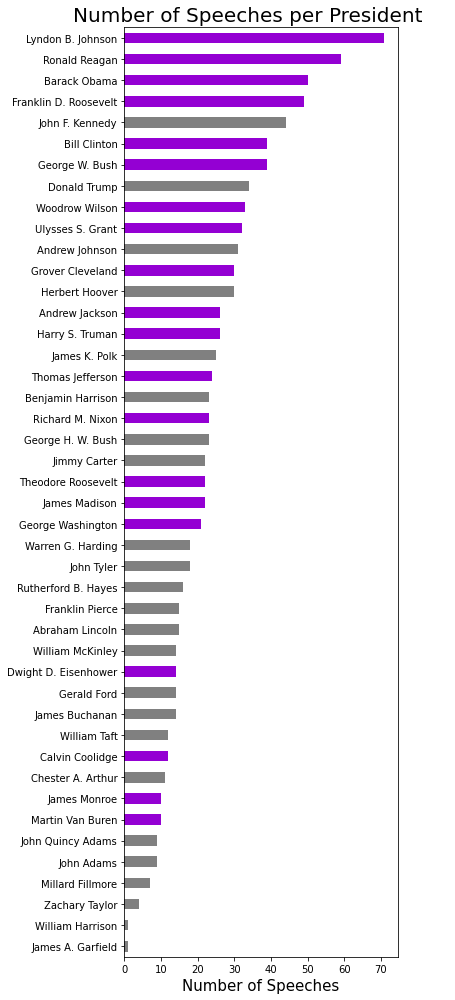

In [8]:
plt.figure(figsize=(6, 14))
my_colors = ['gray','gray','gray','gray','gray','gray', 'darkviolet', 'darkviolet', 'gray', 'darkviolet','gray', 'gray',
            'gray', 'darkviolet', 'gray','gray', 'gray','gray', 'gray', 'gray', 'darkviolet', 'darkviolet', 'darkviolet',
             'gray','gray', 'darkviolet', 'gray','darkviolet', 'gray','darkviolet','darkviolet', 'gray', 'darkviolet',
             'gray', 'darkviolet','darkviolet','gray','darkviolet','darkviolet', 'gray', 'darkviolet','darkviolet','darkviolet','darkviolet']

df.President.value_counts(ascending=True).plot(kind = 'barh', color=my_colors)
plt.xlabel('Number of Speeches', fontsize = 15)
plt.title('Number of Speeches per President    ', fontsize = 20)
plt.tight_layout()
plt.savefig('No._Pres_Speeches.png');

In [32]:
#how many words of each speec and then all speeches total
length = []
for i in df.Speech:
    length.append(len(i))
allofthem = sum(length)
allofthem

23921736

In [33]:
df['length'] = length
df.sample(4)

,Title,Date,President,Speech,Year,Split,Stemmed,length
680,april-27-1965-press-conference-east-room,"April 27, 1965",Lyndon B. Johnson,anscript transcriptthe president good af...,1965,"[anscript, transcriptthe, president, good, aft...","[anscrib, transcriptth, presid, good, afternoo...",26084
55,april-3-1809-message-inhabitants-albemarle-county,"April 03, 1809",Thomas Jefferson,returning to the scenes of my birth and early ...,1809,"[returning, to, the, scenes, of, my, birth, an...","[return, to, the, scen, of, my, bir, and, ear,...",1915
68,march-4-1813-second-inaugural-address,"March 04, 1813",James Madison,about to add the solemnity of an oath to the ...,1813,"[about, to, add, the, solemnity, of, an, oath,...","[about, to, ad, the, solemn, of, an, oa, to, t...",7148
918,january-7-2004-temporary-worker-program-proposal,"January 07, 2004",George W. Bush,anscript transcriptthanks for coming tha...,2004,"[anscript, transcriptthanks, for, coming, than...","[anscrib, transcriptthank, for, com, thank, fo...",14294


In [34]:
df.sort_values(by=['length'])

,Title,Date,President,Speech,Year,Split,Stemmed,length
135,february-24-1841-argument-supreme-court-case-u...,"February 24, 1841",John Quincy Adams,in african captives who were illegally cap...,1841,"[in, african, captives, who, were, illegally, ...","[in, afr, capt, who, wer, illeg, capt, revolt,...",475
11,march-4-1793-second-inaugural-address,"March 04, 1793",George Washington,fellow citizens i am again called upon by the ...,1793,"[fellow, citizens, i, am, again, called, upon,...","[fellow, cit, i, am, again, cal, upon, by, the...",787
217,february-11-1861-farewell-address,"February 11, 1861",Abraham Lincoln,my friends no one not in my situation can ...,1861,"[my, friends, no, one, not, in, my, situation,...","[my, friend, no, on, not, in, my, situ, can, a...",804
539,december-11-1941-message-congress-requesting-w...,"December 11, 1941",Franklin D. Roosevelt,to the congress on the morning of december ele...,1941,"[to, the, congress, on, the, morning, of, dece...","[to, the, congress, on, the, morn, of, decemb,...",825
294,june-22-1877-prohibition-federal-employees-pol...,"June 22, 1877",Rutherford B. Hayes,sir i desire to call your attention to the fo...,1877,"[sir, i, desire, to, call, your, attention, to...","[sir, i, desir, to, cal, yo, at, to, the, foll...",873
...,...,...,...,...,...,...,...,...
421,december-3-1912-fourth-annual-message,"December 03, 1912",William Taft,part on our foreign relations to the sen...,1912,"[part, on, our, foreign, relations, to, the, s...","[part, on, our, foreign, rel, to, the, sen, an...",152225
407,december-3-1907-seventh-annual-message,"December 03, 1907",Theodore Roosevelt,to the senate and house of representatives no...,1907,"[to, the, senate, and, house, of, representati...","[to, the, sen, and, hous, of, repres, no, nat,...",161388
417,december-6-1910-second-annual-message,"December 06, 1910",William Taft,to the senate and house of representatives du...,1910,"[to, the, senate, and, house, of, representati...","[to, the, sen, and, hous, of, repres, dur, the...",165642
571,"STATE OF THE UNION January 21, 1946","January 21, 1946",Harry S. Truman,to the congress of the united states a quarter...,1946,"[to, the, congress, of, the, united, states, a...","[to, the, congress, of, the, unit, stat, a, qu...",169750


## Observations on Speeches themselves
Some of the speeches above are not speeches(summary of J.Q.Adams Supreme Court argument)
Also, some are made when the men were not president(Lincoln Peoria, IL)

#### Longest speech: Truman's State of the Union in 1946.....Shortest speech:  Washington's 2nd Inaugural Address

In [36]:
#No longer needed, and I wanted to clear table
df.drop(['length'], axis=1, inplace=True)


# Vectorize

In [9]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
%matplotlib inline


In [11]:
#Helped me learn some more common words such as thank, you
#Also, let me see many tokens to see I need to go back and get rid of hyphens
fr = FreqDist(df.Split[0])

for s in df.Split[1:]:
    frdist = FreqDist(s)
    fr.update(frdist)
    #print(fr.items())  #This broke the notebook so I have tagged it out

def getKey(item):
    return item[1]
a = fr.items()
sorted(a, key = getKey, reverse=True)

[('the', 313078),
 ('of', 196444),
 ('and', 139150),
 ('to', 138369),
 ('in', 86584),
 ('a', 67491),
 ('that', 62440),
 ('is', 41576),
 ('for', 40615),
 ('be', 39071),
 ('we', 38963),
 ('it', 38575),
 ('our', 36675),
 ('i', 35549),
 ('have', 30887),
 ('this', 29914),
 ('by', 29187),
 ('as', 27465),
 ('with', 25917),
 ('which', 22865),
 ('not', 22804),
 ('are', 22774),
 ('will', 22270),
 ('on', 21717),
 ('has', 17744),
 ('all', 17442),
 ('their', 17214),
 ('been', 16648),
 ('or', 16533),
 ('from', 16209),
 ('but', 15851),
 ('they', 15382),
 ('you', 15291),
 ('at', 14640),
 ('was', 14609),
 ('states', 13997),
 ('government', 13270),
 ('an', 12874),
 ('people', 12608),
 ('can', 11364),
 ('united', 11152),
 ('its', 11001),
 ('so', 10176),
 ('would', 10057),
 ('more', 9792),
 ('these', 9719),
 ('who', 9695),
 ('no', 9300),
 ('there', 9218),
 ('should', 9022),
 ('them', 8997),
 ('if', 8670),
 ('any', 8617),
 ('congress', 8483),
 ('now', 8471),
 ('other', 8370),
 ('s', 8331),
 ('one', 8269),


In [10]:
stop_words2 = ['united', 'state', 'states', 'president', 'don', 'thank', 'mr', 'america', 're',
               've', 'applause', 'transcript', 'anscript', 'country']
stop_words1 = set(stopwords.words('english'))
final_stops = list(stop_words1) + stop_words2

## Finalized NMF Topics

I did numerous experimentations to find the best way to represent the text using my history background.  Test, train words were different so doing without test train split.  I tried with and without stemming, but found stemming chopped off historic content words.  I looked at LSA but found the topics in NMF were better grouped and had understandable historic standouts like the Civil War.  And I experimented with how many topics to look at in both LSA and NMF.  Ten was the magic number.


In [11]:
X = df.Speech
y = df.President

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
cv = CountVectorizer(stop_words=final_stops, max_df=0.4, min_df = 5)

doc_word = cv.fit_transform(X)
X_t_cv  = cv.transform(X)


nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word_nmf = pd.DataFrame(nmf_model.components_.round(3), 
             index = ["component_1","component_2", "component_3","component_4", "component_5", 
                     "component_6","component_7", "component_8","component_9", "component_10"
                     ],
             columns = cv.get_feature_names())
topic_word_nmf

,aaron,abandon,abandoned,abandoning,abandonment,abandons,abated,abatement,abc,abdication,...,yukon,zeal,zealand,zealous,zealously,zero,zimbabwe,zinc,zone,zones
component_1,0.000,0.104,0.123,0.012,0.073,0.002,0.010,0.007,0.000,0.020,...,0.049,0.117,0.038,0.038,0.023,0.000,0.000,0.003,0.190,0.004
component_2,0.013,0.018,0.033,0.000,0.004,0.000,0.000,0.000,0.031,0.000,...,0.000,0.000,0.000,0.000,0.000,0.026,0.005,0.000,0.030,0.110
component_3,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.086,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.005,0.000,0.004,0.000,0.001,0.000,0.001,0.000,...,0.000,0.000,0.004,0.000,0.000,0.002,0.000,0.004,0.054,0.040
component_5,0.004,0.176,0.335,0.014,0.099,0.009,0.008,0.018,0.000,0.000,...,0.001,0.204,0.009,0.052,0.026,0.001,0.000,0.003,0.000,0.002
component_6,0.000,0.000,0.007,0.000,0.000,0.000,0.000,0.000,0.062,0.000,...,0.000,0.000,0.010,0.000,0.000,0.249,0.000,0.037,0.095,0.010
component_7,0.000,0.000,0.007,0.000,0.000,0.001,0.001,0.000,0.000,0.000,...,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
component_8,0.002,0.254,0.039,0.056,0.028,0.008,0.000,0.000,0.002,0.012,...,0.007,0.037,0.041,0.001,0.003,0.022,0.013,0.000,0.043,0.050
component_9,0.000,0.000,0.000,0.028,0.000,0.000,0.001,0.001,0.099,0.000,...,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.051,0.000
component_10,0.002,0.008,0.017,0.000,0.000,0.000,0.001,0.000,0.003,0.006,...,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.628,0.005


In [42]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [43]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
department, commission, officers, commerce, court, conditions, attention, report, per, navy

Topic  1
tax, jobs, governor, health, percent, get, tonight, economy, cut, budget

Topic  2
slavery, slave, missouri, nebraska, compromise, principle, slaves, bill, north, repeal

Topic  3
dollars, million, fiscal, expenditures, program, billion, economic, production, estimated, total

Topic  4
mexico, treasury, treaty, amount, territory, revenue, duties, condition, thus, bank

Topic  5
going, get, lot, really, got, look, job, something, thing, tell

Topic  6
examination, classified, commission, person, officer, examinations, rule, fitness, appointment, customs

Topic  7
soviet, economic, nuclear, europe, vietnam, south, weapons, arms, east, problems

Topic  8
senator, kennedy, uh, going, dole, nixon, bill, vice, get, four

Topic  9
panama, november, republic, colon, treaty, isthmus, department, canal, telegram, hay


In [77]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(3),
                             index = df.Year.astype(int), 
                             columns = ["Domestic","Economy1", "Slavery","Economy2","Mid_1800s_Politics",  
                     "Encouragement","Civil_Service", "Cold_War","20th_Cent_Politics", "Panama_Canal"
                     ])
dtn = doc_topic_nmf.groupby(doc_topic_nmf.index).sum()

dtn.reset_index(level = 0, inplace = True)
graph_topics = dtn.groupby(dtn.Year // 10 * 10).sum()
graph_topics.drop(['Year'], axis=1, inplace = True) 
graph_topics.head()

,Domestic,Economy1,Slavery,Economy2,Mid_1800s_Politics,Encouragement,Civil_Service,Cold_War,20th_Cent_Politics,Panama_Canal
Year,,,,,,,,,,
1780,0.044,0.016,0.021,0.000,0.190,0.000,0.004,0.107,0.005,0.019
1790,1.118,0.208,0.459,0.013,6.222,0.231,0.566,1.989,0.185,1.051
1800,1.304,0.306,0.895,0.553,6.921,0.379,0.524,1.713,0.131,0.738
1810,1.045,0.123,0.382,0.435,9.906,0.042,0.178,1.330,0.086,0.812
1820,3.490,0.075,0.470,0.321,16.673,0.014,0.626,1.385,0.031,1.073


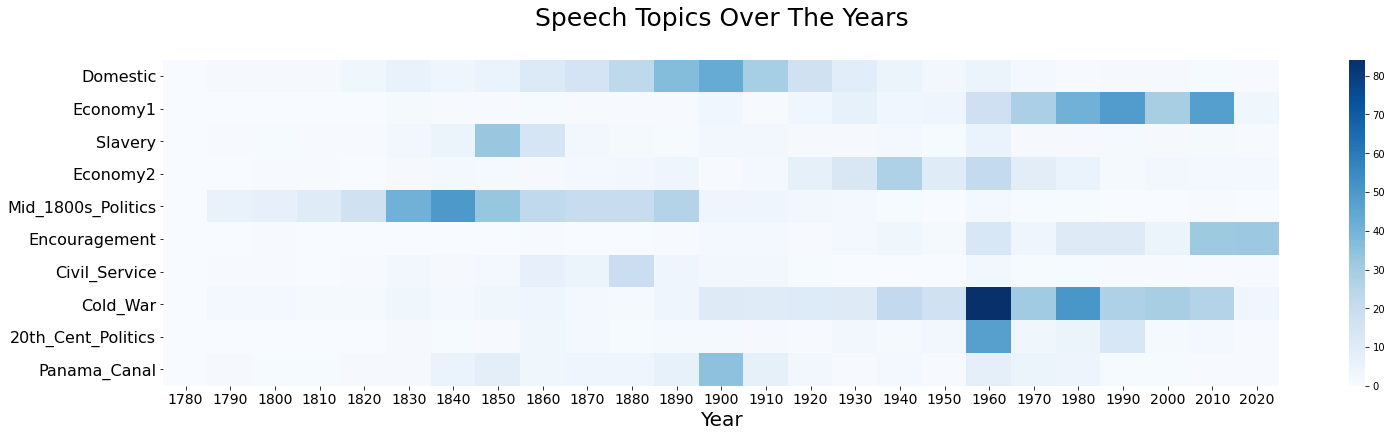

In [48]:
plt.figure(figsize = (25, 6))
sns.heatmap(graph_topics.T, annot=False, cbar=True, cmap="Blues")
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.title('Speech Topics Over The Years\n', fontsize=25)
plt.savefig('Speech_heatmap.png');

## Examples of experimentation

In [103]:
def pres_to_party(name):
    republican = ['Abraham Lincoln', 'Ulysses S. Grant', 'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur', 
                  'Benjamin Harrison', 'William McKinley', 'Theodore Roosevelt', 
                  'William Taft', 'Warren G. Harding', 'Calvin Coolidge', 'Herbert Hoover', 'Dwight D. Eisenhower', 
                  'Richard M. Nixon', 'Gerald Ford', 'Ronald Reagan', 'George H. W. Bush', 
                  'George W. Bush', 'Donald Trump']
    if name in republican:
        return 'Republican'
    
    democratic = ['Andrew Jackson', 'Martin Van Buren', 'James K. Polk', 'Franklin Pierce', 'Andrew Johnson',
                  'James Buchanan', 'Grover Cleveland', 'Woodrow Wilson', 'Franklin D. Roosevelt', 
                  'Harry S. Truman', 'John F. Kennedy', 'Lyndon B. Johnson', 'Jimmy Carter', 'Bill Clinton', 'Barack Obama']
    if name in democratic:
        return 'Democratic'
    
    whig = ['William Harrison', 'Zachary Taylor', 'Millard Fillmore', 'John Tyler']
    if name in whig:
        return 'Whig'
    
    unaffiliated = ['George Washington']
    if name in unaffiliated:
        return 'Unaffiliated'
    
    federalist = ['John Adams']
    if name in federalist:
        return 'Federalist'
    
    democratic_republican = ['Thomas Jefferson', 'James Madison', 'James Monroe', 'John Quincy Adams']
    if name in democratic_republican:
        return 'Democratic-Republican'
    
df['Party'] = df.President.apply(pres_to_party)

In [106]:
justseeing = df.groupby('Party').size()
justseeing

Party
Democratic               485
Democratic-Republican     65
Federalist                 9
Republican               411
Unaffiliated              21
Whig                      30
dtype: int64

It is because of this imbalance that I chose not do any analysis by party.  I did not want to group the non Democrat/Republican into an 'other' as the parties had polarizing viewpoints.  But I also didn't want to not include them as they included the thoughts of our Founding Fathers.   I did attempt scaling in a couple of ways but it made for mixed messages.

## Word Clouds :)

In [ ]:
#pip install wordcloud

In [295]:
array_Presidents = df.President.unique()
array_Presidents

array(['George Washington', 'John Adams', 'Thomas Jefferson',
       'James Madison', 'James Monroe', 'John Quincy Adams',
       'Andrew Jackson', 'Martin Van Buren', 'John Tyler',
       'William Harrison', 'James K. Polk', 'Zachary Taylor',
       'Millard Fillmore', 'Abraham Lincoln', 'Franklin Pierce',
       'James Buchanan', 'Andrew Johnson', 'Ulysses S. Grant',
       'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur',
       'Grover Cleveland', 'Benjamin Harrison', 'William McKinley',
       'Theodore Roosevelt', 'William Taft', 'Woodrow Wilson',
       'Warren G. Harding', 'Calvin Coolidge', 'Herbert Hoover',
       'Franklin D. Roosevelt', 'Harry S. Truman', 'Richard M. Nixon',
       'Dwight D. Eisenhower', 'John F. Kennedy', 'Lyndon B. Johnson',
       'Ronald Reagan', 'Gerald Ford', 'Jimmy Carter',
       'George H. W. Bush', 'Bill Clinton', 'George W. Bush',
       'Barack Obama', 'Donald Trump'], dtype=object)

In [76]:
from wordcloud import WordCloud


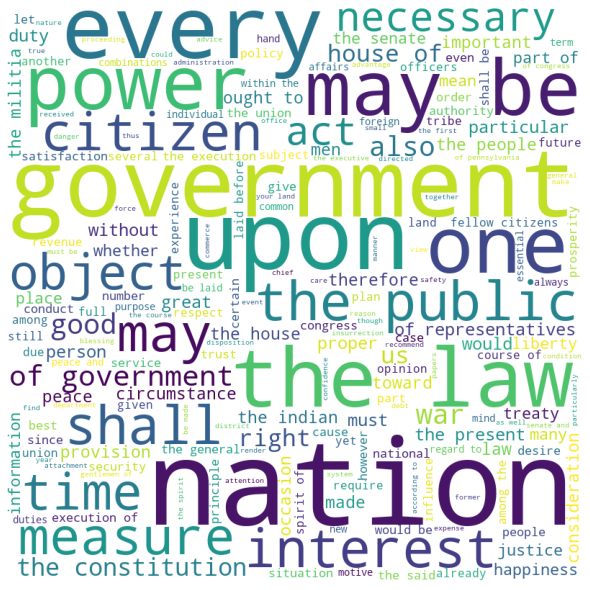

In [536]:
def wordCloud(section):
    comment_words = '' 
    stopwords = set(final_stops) 

    # iterate through the csv file 
    for val in section: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        comment_words += " ".join(tokens)+" "

    word_cloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(word_cloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0); 

wordCloud(df.Speech[:20])   
#This was for George Washington


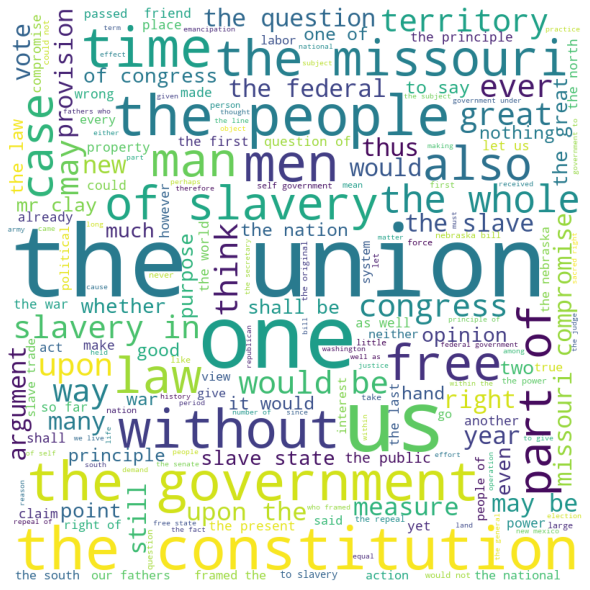

In [458]:
make_cloud('Lincoln')

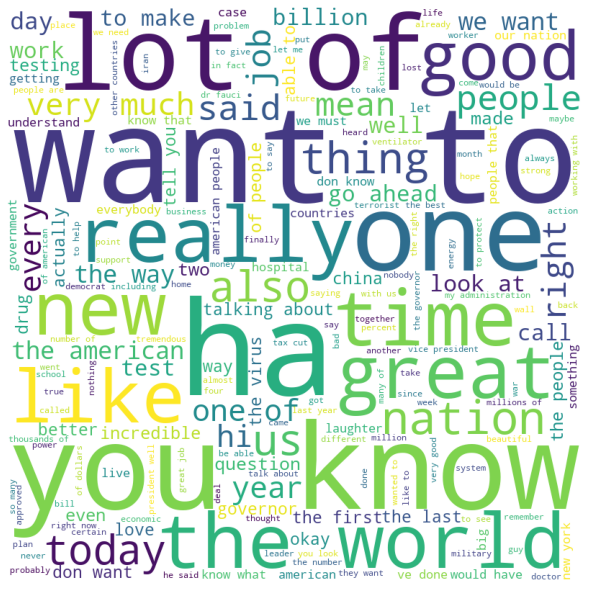

In [413]:
#comparing Trump's words
wordCloud(df.Speech[-28:])

## Sentiment Analysis

In [540]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import sentiment_analyzer

In [ ]:
#nltk.download('vader_lexicon')

In [13]:
allMywords = topic_word_nmf.columns
allw = [w for w in allMywords]
allw

['aaron',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons',
 'abated',
 'abatement',
 'abc',
 'abdication',
 'abe',
 'abet',
 'abetting',
 'abeyance',
 'abhorrence',
 'abhorrent',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'ablest',
 'ably',
 'abnormal',
 'aboard',
 'abode',
 'abodes',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'aboriginal',
 'aborigines',
 'abortion',
 'abortions',
 'abortive',
 'abound',
 'abounding',
 'abounds',
 'abraham',
 'abrams',
 'abreast',
 'abridge',
 'abridged',
 'abridging',
 'abroad',
 'abrogate',
 'abrogated',
 'abrogation',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absentee',
 'absolute',
 'absolutely',
 'absolved',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'absorption',
 'abstain',
 'abstained',
 'abstaining',
 'abstinence',
 'abstract',
 'absurd',
 'absurdity',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'abusive',
 'abyss',
 'academic',
 'acad

In [14]:
def sentiment_analysis_old(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    print(score)

In [15]:
def negative(text):
    negatives = []
    for line in text:
        sp = ' '.join(line)
        score = SentimentIntensityAnalyzer().polarity_scores(sp)
        negatives.append(score['neg'])
    return negatives

In [16]:
def sentiment_positive(text):
    positives = []
    for line in text:
        sp = ' '.join(line)
        score = SentimentIntensityAnalyzer().polarity_scores(sp)
        positives.append(score['pos'])
    return positives

In [18]:
df['Sentiment'] = sentiment_positive(df.Split)
df_neg =df.copy()
df_neg.to_csv('d8.csv')

In [19]:
df.sample()

,Title,Date,President,Speech,Year,Split,Stemmed,Sentiment
602,STATE OF THE UNION 1959,1959,Dwight D. Eisenhower,this is the moment when congress and the execu...,1959,"[this, is, the, moment, when, congress, and, t...","[thi, is, the, mom, when, congress, and, the, ...",0.221


In [20]:
df_neg['Negative'] = negative(df.Split)
df_neg.sample()

,Title,Date,President,Speech,Year,Split,Stemmed,Sentiment,Negative
364,december-17-1895-message-regarding-venezuelan-...,"December 17, 1895",Grover Cleveland,to the congress in my annual message addressed...,1895,"[to, the, congress, in, my, annual, message, a...","[to, the, congress, in, my, an, mess, address,...",0.159,0.051


In [21]:
#another way to make a function of sentiment analysis
def sentiment_analysis(president):
    filter1 = df.President.str.contains(president)
    func_df = df.loc[filter1]
    text = ''.join(str(func_df.Split[:]))
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    print(score)

In [22]:
sentiment_analysis('Franklin D. Roosevelt')

{'neg': 0.008, 'neu': 0.91, 'pos': 0.081, 'compound': 0.9744}


In [24]:
for line in df.Split[515:555]:
    sp = ' '.join(line)
    sentiment_analysis_old(sp)

{'neg': 0.046, 'neu': 0.822, 'pos': 0.132, 'compound': 0.9998}
{'neg': 0.071, 'neu': 0.758, 'pos': 0.171, 'compound': 0.9999}
{'neg': 0.06, 'neu': 0.793, 'pos': 0.147, 'compound': 0.9995}
{'neg': 0.096, 'neu': 0.719, 'pos': 0.185, 'compound': 0.9996}
{'neg': 0.077, 'neu': 0.762, 'pos': 0.161, 'compound': 0.9998}
{'neg': 0.056, 'neu': 0.757, 'pos': 0.187, 'compound': 0.9999}
{'neg': 0.078, 'neu': 0.735, 'pos': 0.187, 'compound': 0.9999}
{'neg': 0.084, 'neu': 0.76, 'pos': 0.156, 'compound': 0.9998}
{'neg': 0.123, 'neu': 0.717, 'pos': 0.16, 'compound': 0.9987}
{'neg': 0.111, 'neu': 0.664, 'pos': 0.225, 'compound': 0.9999}
{'neg': 0.062, 'neu': 0.791, 'pos': 0.147, 'compound': 0.9999}
{'neg': 0.067, 'neu': 0.793, 'pos': 0.14, 'compound': 0.9998}
{'neg': 0.089, 'neu': 0.765, 'pos': 0.146, 'compound': 0.9988}
{'neg': 0.092, 'neu': 0.703, 'pos': 0.205, 'compound': 0.9997}
{'neg': 0.095, 'neu': 0.715, 'pos': 0.19, 'compound': 0.9996}
{'neg': 0.091, 'neu': 0.763, 'pos': 0.147, 'compound': 0.999

In [313]:
def sentiment_analysis_graph(president):
    filter1 = df.President.str.contains(president)
    func_df = df.loc[filter1]
    text = ''.join(str(func_df.Split[:]))
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    return score['pos']


In [26]:
df_sent = df.copy().sort_values(by = 'Year')
df_sent = df_sent.groupby(['President'], sort=False).mean().reset_index()
df_sent.to_csv('President_sentiment.csv')
df_sent

,President,Sentiment
0,George Washington,0.177381
1,John Adams,0.186444
2,Thomas Jefferson,0.154583
3,James Madison,0.167045
4,James Monroe,0.176100
5,John Quincy Adams,0.149111
6,Andrew Jackson,0.140192
7,Martin Van Buren,0.145300
8,John Tyler,0.133833
9,William Harrison,0.179000
